# Placement Prediction

In this Project we are going to Predict weather the Student will get placed or not

For the Prediction we use 3 Algorithms :
1. LogisticRegression
2. DecisionTreeClassifier
3. KNeighborsClassifier

By using the above algorithms, we will train our model by providing training data and once the model will be trained, we will perform prediction. After prediction, we will evaluate the performance of these algorithmns by error check and accuracy check.

Steps been followed are as:

Step 1:Data Exploration

Step 2: Data Cleaning

Step 3:Data training

Step 4: Importing Models

Step 5:Importing Pipeline to Connect the Steps

Step 6:Hyperparameter Tunning

Step 7:Training our all three models by using pipeline¶

Step 8: Performance Evaluation

# Data Exploration

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('placementdata.csv')

In [3]:
df.shape

(10000, 12)

In [4]:
df.sample(5)

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
9673,9674,8.2,2,2,3,84,3.9,No,Yes,71,84,NotPlaced
7815,7816,8.5,1,3,2,90,4.7,Yes,Yes,75,81,Placed
3063,3064,8.8,2,3,2,90,4.6,Yes,Yes,85,83,Placed
8644,8645,8.5,2,3,0,90,3.8,Yes,Yes,87,84,Placed
1783,1784,8.6,2,3,2,90,4.6,Yes,Yes,69,86,NotPlaced


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [6]:
df.describe()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,7.698010,1.049200,2.026600,1.013200,79.449900,4.323960,69.159400,74.501500
std,2886.89568,0.640131,0.665901,0.867968,0.904272,8.159997,0.411622,10.430459,8.919527
min,1.00000,6.500000,0.000000,0.000000,0.000000,60.000000,3.000000,55.000000,57.000000
25%,2500.75000,7.400000,1.000000,1.000000,0.000000,73.000000,4.000000,59.000000,67.000000
50%,5000.50000,7.700000,1.000000,2.000000,1.000000,80.000000,4.400000,70.000000,73.000000
75%,7500.25000,8.200000,1.000000,3.000000,2.000000,87.000000,4.700000,78.000000,83.000000
max,10000.00000,9.100000,2.000000,3.000000,3.000000,90.000000,4.800000,90.000000,88.000000


In [7]:
df.isnull().sum()

StudentID                    0
CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64

# Data Cleaning

In [8]:
df=df.drop(columns='StudentID',axis=1)

In [9]:
df.head()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


# Data Training 

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# Here xtrain and xtest are the features and ytrain and ytest has the targest. i.e.. "PlacementStatus"
xtrain,xtest,ytrain,ytest=train_test_split(df.drop(columns='PlacementStatus',axis=1),df['PlacementStatus'],test_size=0.2)
# Ratio to Splitting the Training and testing data is 8:2

In [12]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(8000, 10)
(2000, 10)
(8000,)
(2000,)


Now we transform our categorical data into numerical values 

And

We reshape our Numerical values from (-1 to 1)

And we use LabelEncoder to assign value to our categorical target column

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder

In [14]:
clf1=ColumnTransformer(transformers=[
    ('OneHotEncoder',OneHotEncoder(),[1,2,3,6,7]),
    ('StandardScaler',StandardScaler(),[0,4,5,8,9])
],remainder='passthrough')

In [15]:
label=LabelEncoder()

In [16]:
ytrain=label.fit_transform(ytrain)

In [17]:
ytest=label.transform(ytest)

# Importing Models

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [19]:
lr=LogisticRegression()

# Hyperparameter Tunning

For DecisionTreeClassifier firstly we perform Hyperparameter tunning for the best accuracy score from DecisionTreeClassifier

Then we Train our DecisionTreeClassifier

In [23]:
parameters={
    'max_depth':[0,1,2,3,4,5,6,7,8,9,],
    'min_samples_split':[1,2,3,4,5,6,7,8,9],
    'min_samples_leaf':[1,2,3,4,5,6,7,8,9],
    'max_features':[1,2,3,4,5,6,7,8,9]
}

In [24]:
xtrainnew=clf1.fit_transform(xtrain)

In [25]:
from sklearn.model_selection import RandomizedSearchCV

In [26]:
search=RandomizedSearchCV(estimator=DecisionTreeClassifier(),param_distributions=parameters,n_jobs=-1,cv=10)

In [27]:
search.fit(xtrainnew,ytrain)

C:\Users\Gungun Tyagi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Gungun Tyagi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Gungun Tyagi\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "C:\Users\Gungun Tyagi\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\Gungun Tyagi\anaconda3\Lib\si

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                      9],
                                        'max_features': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9]})

In [28]:
search.best_score_

0.785125

In [29]:
search.best_params_

{'min_samples_split': 8,
 'min_samples_leaf': 5,
 'max_features': 7,
 'max_depth': 5}

In [33]:
xtestnew=clf1.fit_transform(xtest)

In [35]:
from sklearn.metrics import accuracy_score
score=[]
for i in range(1,10) :
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrainnew,ytrain)
    y_pred=knn.predict(xtestnew)
    score.append(accuracy_score(ytest,y_pred))
    

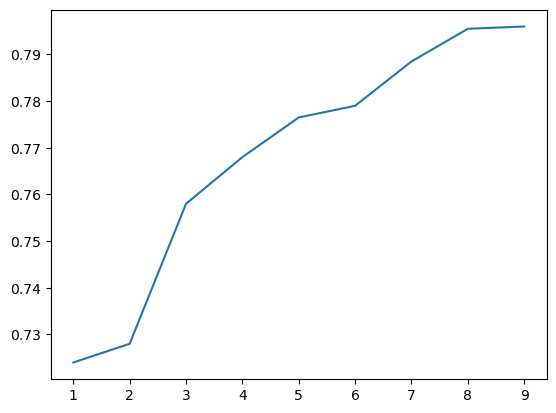

In [36]:
import matplotlib.pyplot as plt
plt.plot(range(1,10),score)

# Importing Pipeline to Connect the Steps

In [176]:
from sklearn.pipeline import Pipeline

# Training our all three models by using pipeline

In [168]:
LR=Pipeline([
    ('clf1',clf1),
    ('LogisticRegression',lr)])

In [169]:
LR.fit(xtrain,ytrain)

Pipeline(steps=[('clf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHotEncoder',
                                                  OneHotEncoder(),
                                                  [1, 2, 3, 6, 7]),
                                                 ('StandardScaler',
                                                  StandardScaler(),
                                                  [0, 4, 5, 8, 9])])),
                ('LogisticRegression', LogisticRegression())])

In [170]:
dtc=DecisionTreeClassifier(min_samples_split= 2,
 min_samples_leaf= 8,
 max_features= 6,
 max_depth= 5)

In [171]:
DTC=Pipeline([
    ('clf1',clf1),
    ('DecisionTreeClassifier',dtc)])

In [172]:
DTC.fit(xtrain,ytrain)

Pipeline(steps=[('clf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHotEncoder',
                                                  OneHotEncoder(),
                                                  [1, 2, 3, 6, 7]),
                                                 ('StandardScaler',
                                                  StandardScaler(),
                                                  [0, 4, 5, 8, 9])])),
                ('DecisionTreeClassifier',
                 DecisionTreeClassifier(max_depth=5, max_features=6,
                                        min_samples_leaf=8))])

In [173]:
knc=KNeighborsClassifier(n_neighbors=8)

In [174]:
KNC=Pipeline([
    ('clf1',clf1),
    ('KNeighborsClassifier',knc)])

In [175]:
KNC.fit(xtrain,ytrain)

Pipeline(steps=[('clf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHotEncoder',
                                                  OneHotEncoder(),
                                                  [1, 2, 3, 6, 7]),
                                                 ('StandardScaler',
                                                  StandardScaler(),
                                                  [0, 4, 5, 8, 9])])),
                ('KNeighborsClassifier', KNeighborsClassifier(n_neighbors=8))])

# Performance Evaluation

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
pred1=LR.predict(xtest)
pred2=DTC.predict(xtest)
pred3=KNC.predict(xtest)

In [42]:
accscore1=accuracy_score(ytest,pred1)
accscore2=accuracy_score(ytest,pred2)
accscore3=accuracy_score(ytest,pred3)

In [43]:
score1=LR.score(xtrain,ytrain)
score2=DTC.score(xtrain,ytrain)
score3=KNC.score(xtrain,ytrain)

In [44]:
print('The accuracy_score of LogisticRegression is ',accscore1)
print('The accuracy_score of DecisionTreeClassifier is ',accscore2)
print('The accuracy_score of KNeighborsClassifier is ',accscore3)

The accuracy_score of LogisticRegression is  0.81
The accuracy_score of DecisionTreeClassifier is  0.7915
The accuracy_score of KNeighborsClassifier is  0.7955


In [45]:
print('The score of LogisticRegression is ',score1)
print('The score of DecisionTreeClassifier is ',score2)
print('The score of KNeighborsClassifier is ',score3)

The score of LogisticRegression is  0.79875
The score of DecisionTreeClassifier is  0.786125
The score of KNeighborsClassifier is  0.820625


Conclusion : 
1. Logistic Regression has the highest accuracy score (0.81) but is slightly lower than K-Nearest Neighbors when it comes to the model score.
2. K-Nearest Neighbors has the highest model score (0.820625), though its accuracy score is lower than Logistic Regression's.
3. DecisionTreeClassifier has the lowest accuracy score and model score in compare of LogisticRegression and KNeighborsClassifier

K-Nearest Neighbors would be the best model for the best prediction result

In [46]:
import pickle
pickle.dump(KNC,open('Placement Prediction.pkl','wb'))